In [213]:
from pyedflib import highlevel
import numpy as np
import glob
import matplotlib.pyplot as plt

path = "C:/Users/hallym/Desktop/SleepEDF/sleep-cassette"
# path = '[my_path]/sleep-edfx/1.0.0/sleep-cassette'
data_list = glob.glob(path+'/**')
trains = [x for x in data_list if x.endswith('PSG.edf')]
labels = [x for x in data_list if x.endswith('Hypnogram.edf')]

result = []
Max_num = 152 + 1

In [255]:
sample = 1
sleep_data_signal = highlevel.read_edf(trains[sample])[0]
sleep_data_label = highlevel.read_edf(trains[sample])[1]
sleep_data1_test = highlevel.read_edf(labels[sample])

# print(sleep_data1)

for signal, info in zip(sleep_data_signal, sleep_data_label):
    print(signal.shape, info['label'], info['sample_rate'], signal.shape[0]//info['sample_rate'])

(8490000,) EEG Fpz-Cz 3000.0 2830.0
(8490000,) EEG Pz-Oz 3000.0 2830.0
(8490000,) EOG horizontal 3000.0 2830.0
(84900,) Resp oro-nasal 30.0 2830.0
(84900,) EMG submental 30.0 2830.0
(84900,) Temp rectal 30.0 2830.0
(84900,) Event marker 30.0 2830.0


In [215]:
# for train, label in zip(sleep_data_signal, sleep_data_label):
#     print(train.shape/(label['sample_rate']) , end = " ")
#     print(label['sample_rate'])

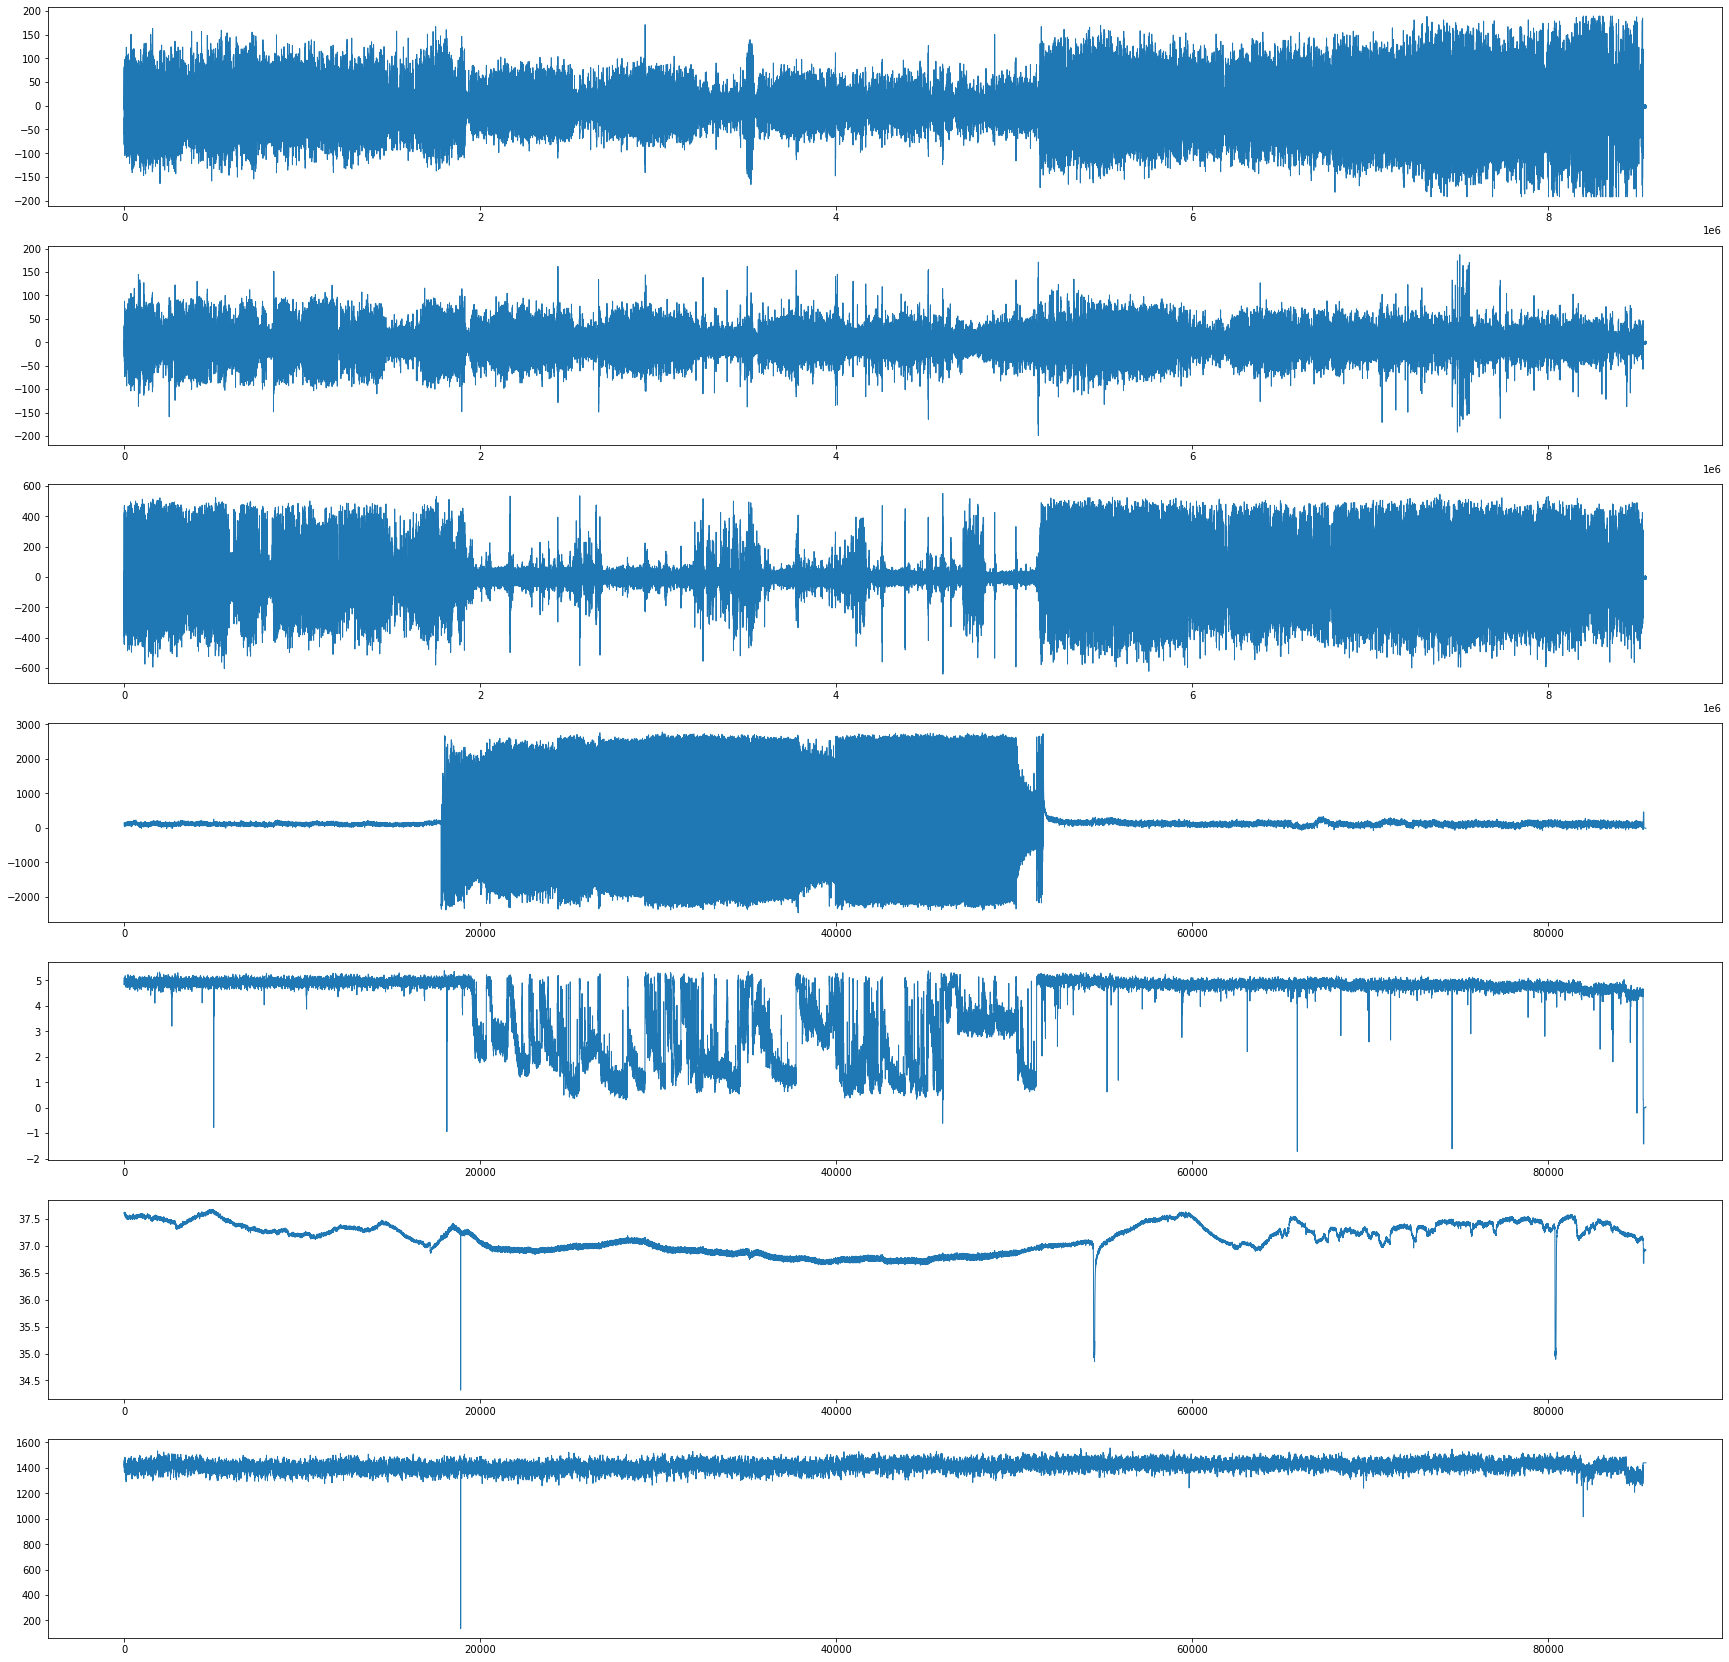

In [216]:
plt.figure(figsize=(30, 30))
# color = ['blue' , 'orange', 'yellow', 'purple', 'green', 'cyan', 'magenta']
idx = 1
for e in sleep_data_signal:
    plt.subplot(7,1,idx)
    line = plt.plot(e)
    plt.setp(line, linewidth = 1)
    idx+=1
plt.show()

In [217]:
for idx in range(7):
    print(sleep_data1_label[idx]['label'])

EEG Fpz-Cz
EEG Pz-Oz
EOG horizontal
Resp oro-nasal
EMG submental
Temp rectal
Event marker


In [218]:
## 1. Ranple_rate : 3000.0 -> 초당 3000개의 데이터를 샘플링 하였다.
## EEG - 뇌파신호이다.!


In [219]:
sleep_data1_test[-1]['annotations'].__len__() 

171

In [240]:
sleep_data_signal = highlevel.read_edf(trains[sample])[0]
sleep_data_signal[0].shape



(8550000,)

In [253]:
tmp = 0
# Max_num = 152+1

for idx in range(Max_num): # 총 153개의 데이터 
    d1 = highlevel.read_edf(trains[idx])[0] # 순서대로 읽기 (PSG.edf)
    d2 = highlevel.read_edf(labels[idx])    # 라벨 데이터 (Hypnogram.edf)
    
    for element in d2[-1]['annotations']:   # 라벨 데이터 순회 [start , step , sleep stage] 로 구분
        if element[0] == 0:                 # 시작 데이터 따로 처리
            tmp = element[1]                # tmp에 step값을 넣어줌
            continue

        if element[0] != tmp:               # start값이 이전 값의 start+step과 같은지 비교
            print("Exception")
            break
            
        if element[2][-1] == "?":           # ???가 찍히는 값은 모두 출력
            print(idx, element, "???? check", d1[0].shape[0])

        tmp = element[0] + element[1]       # tmp값은 이전 값의 start+step값
        
    
    if int(element[0] * 100) == d1[0].shape[0]: # 100HZ 데이터 이기 때문에 100을 곱해줌
        # print("complete", int(element[0] * 100), d1[0].shape[0]) # 너무 많아서 출력 X
        pass
    else:
        print(idx, " data", "dimension Error", int(element[0] * 100), d1[0].shape[0]) # 100HZ 데이터 이기 때문에
    
print("============ Process End ============")

0 [79500.0, 6900.0, 'Sleep stage ?'] ???? check 7950000
1 [84900.0, 1500.0, 'Sleep stage ?'] ???? check 8490000
2 [84060.0, 2340.0, 'Sleep stage ?'] ???? check 8406000
3 [85440.0, 960.0, 'Sleep stage ?'] ???? check 8550000
3  data dimension Error 8544000 8550000
4 [84120.0, 2280.0, 'Sleep stage ?'] ???? check 8412000
5 [82680.0, 3720.0, 'Sleep stage ?'] ???? check 8268000
6 [84600.0, 1800.0, 'Sleep stage ?'] ???? check 8460000
7 [81960.0, 4440.0, 'Sleep stage ?'] ???? check 8196000
8 [77100.0, 9300.0, 'Sleep stage ?'] ???? check 7710000
9 [83760.0, 2640.0, 'Sleep stage ?'] ???? check 8376000
10 [81660.0, 4740.0, 'Sleep stage ?'] ???? check 8166000
11 [84180.0, 2220.0, 'Sleep stage ?'] ???? check 8418000
12 [83100.0, 3300.0, 'Sleep stage ?'] ???? check 8310000
13 [84900.0, 1500.0, 'Sleep stage ?'] ???? check 8490000
14 [84300.0, 2100.0, 'Sleep stage ?'] ???? check 8430000
15 [83100.0, 3300.0, 'Sleep stage ?'] ???? check 8310000
16 [83880.0, 2520.0, 'Sleep stage ?'] ???? check 8388000
17

In [271]:
highlevel.read_edf(labels[144])[-1]['annotations']

[[0.0, 1380.0, 'Sleep stage W'],
 [1380.0, 270.0, 'Sleep stage 1'],
 [1650.0, 3360.0, 'Sleep stage W'],
 [5010.0, 90.0, 'Sleep stage 1'],
 [5100.0, 120.0, 'Sleep stage W'],
 [5220.0, 60.0, 'Sleep stage 1'],
 [5280.0, 30.0, 'Sleep stage 2'],
 [5310.0, 30.0, 'Sleep stage 1'],
 [5340.0, 60.0, 'Sleep stage 2'],
 [5400.0, 30.0, 'Sleep stage 1'],
 [5430.0, 30.0, 'Sleep stage 2'],
 [5460.0, 30.0, 'Sleep stage 1'],
 [5490.0, 300.0, 'Sleep stage 2'],
 [5790.0, 60.0, 'Sleep stage 1'],
 [5850.0, 390.0, 'Sleep stage 2'],
 [6240.0, 30.0, 'Sleep stage W'],
 [6270.0, 90.0, 'Sleep stage 1'],
 [6360.0, 30.0, 'Sleep stage 2'],
 [6390.0, 30.0, 'Sleep stage 1'],
 [6420.0, 270.0, 'Sleep stage 2'],
 [6690.0, 30.0, 'Sleep stage 1'],
 [6720.0, 180.0, 'Sleep stage 2'],
 [6900.0, 30.0, 'Sleep stage W'],
 [6930.0, 30.0, 'Sleep stage 1'],
 [6960.0, 4560.0, 'Sleep stage W'],
 [11520.0, 60.0, 'Sleep stage 1'],
 [11580.0, 120.0, 'Sleep stage 2'],
 [11700.0, 17370.0, 'Sleep stage W'],
 [29070.0, 120.0, 'Sleep stage 1

## 데이터 보간 시 어떻게 해야할까

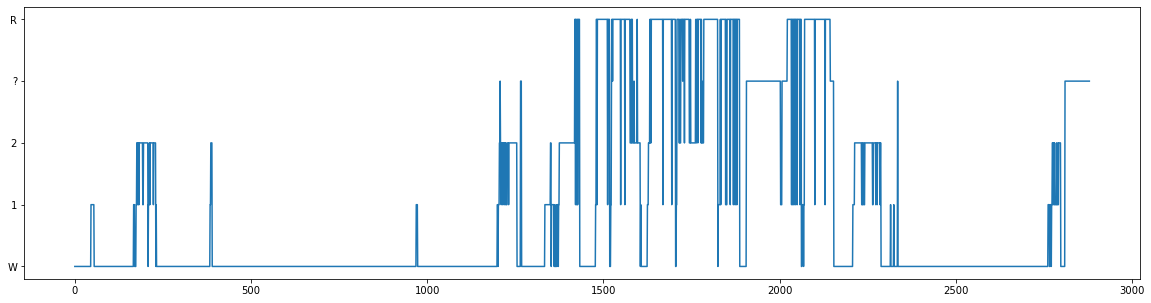

In [290]:
troblem_list = [3, 19, 24, 71, 79, 82, 91, 92, 93, 109, 110, 117, 126, 127, 143, 144]
sleep_stage = []
for idx in range(144,145, 1): # 총 153개의 데이터 
    d1 = highlevel.read_edf(trains[idx])[0] # 순서대로 읽기 (PSG.edf)
    d2 = highlevel.read_edf(labels[idx])    # 라벨 데이터 (Hypnogram.edf)
    cnt = 0
    for element in d2[-1]['annotations']:   # 라벨 데이터 순회 [start , step , sleep stage] 로 구분
        step = element[1]
        stage = element[2]

        for idx in range(0, int(step), 30):
            if stage[-1] == "e":
                sleep_stage.append(d2[-1]['annotations'][cnt+1][2][-1])
                continue

            sleep_stage.append(stage[-1])

        cnt+=1

plt.figure(figsize = (20,5))
plt.plot(sleep_stage)
plt.show()

In [208]:
sleep_stage = []
for e in sleep_data1_test[-1]['annotations']:
    start = e[0]
    step  = e[1]
    stage = e[2]
    
    
    # print(e)
    for idx in range(0, int(step), 30):
        
        if stage[-1] == "?":
            continue
            
        sleep_stage.append(stage[-1])
        
    

print(sleep_stage.__len__())

2848


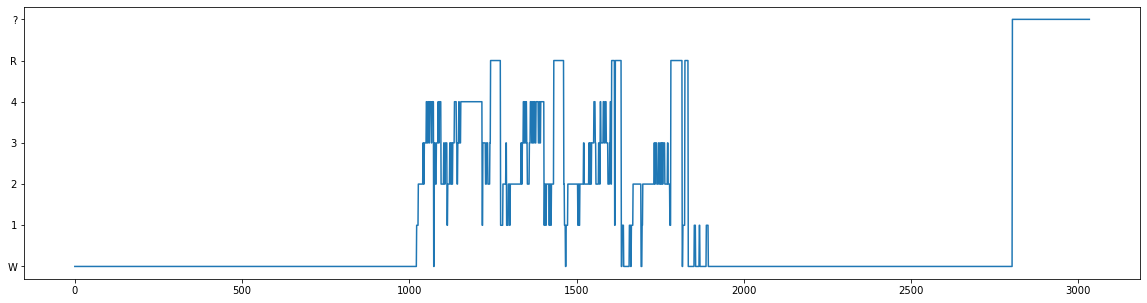

In [149]:
plt.figure(figsize = (20,5))
plt.plot(sleep_stage)
plt.show()

In [137]:
sleep_stage1 = sleep_stage[:2605]
sleep_stage1.__len__()

2605

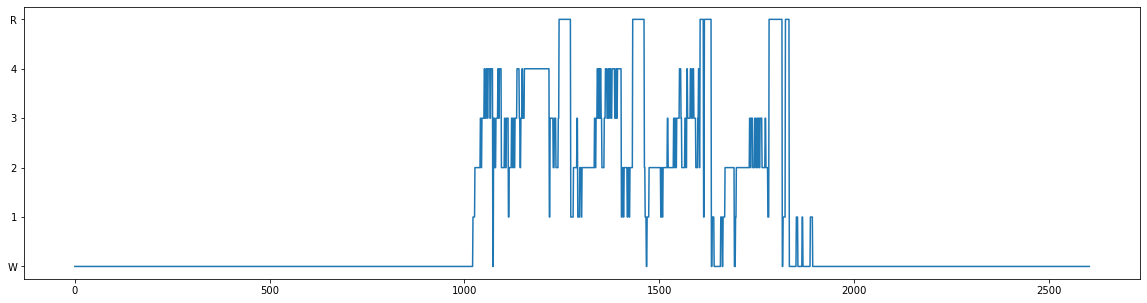

In [138]:
plt.figure(figsize = (20,5))
plt.plot(sleep_stage1)
plt.show()

## 신호 데이터 뜯어보기

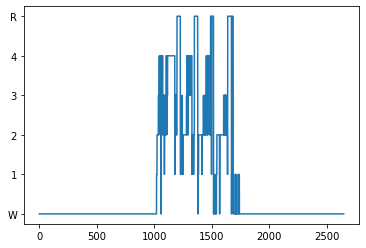

In [321]:
sleep_stage = []
cnt = 0
for e in highlevel.read_edf(labels[0])[-1]['annotations']:
    step = e[1]
    for idx in range(0, int(step), 30):
        if e[-1][-1] == "?":
            continue
            # print(highlevel.read_edf(labels[0])[-1]['annotations'][cnt-1][-1][-1])
            sleep_stage.append(highlevel.read_edf(labels[0])[-1]['annotations'][cnt-1][-1][-1])
            continue
        sleep_stage.append(e[-1][-1])
    
    cnt+=1
# print(sleep_stage[-10:])
plt.plot(sleep_stage)
plt.show()

1997
58
250
101
119
125


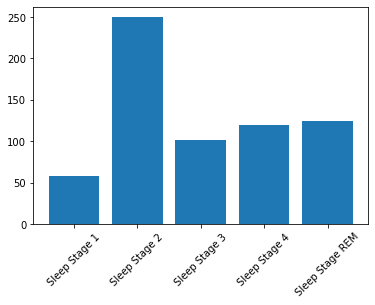

In [347]:
print(sleep_stage.count('W'))
print(sleep_stage.count('1'))
print(sleep_stage.count('2'))
print(sleep_stage.count('3'))
print(sleep_stage.count('4'))
print(sleep_stage.count('R'))

num_cnt = [sleep_stage.count('1'), sleep_stage.count('2'), sleep_stage.count('3'), sleep_stage.count('4'),
           sleep_stage.count('R')]

plt.bar(['Sleep Stage 1', 'Sleep Stage 2', 'Sleep Stage 3', 'Sleep Stage 4', 'Sleep Stage REM'], num_cnt)
plt.xticks(rotation = 45)
plt.show()

In [323]:
highlevel.read_edf(labels[0])[-1]['annotations']

[[0.0, 30630.0, 'Sleep stage W'],
 [30630.0, 120.0, 'Sleep stage 1'],
 [30750.0, 390.0, 'Sleep stage 2'],
 [31140.0, 30.0, 'Sleep stage 3'],
 [31170.0, 30.0, 'Sleep stage 2'],
 [31200.0, 150.0, 'Sleep stage 3'],
 [31350.0, 30.0, 'Sleep stage 4'],
 [31380.0, 60.0, 'Sleep stage 3'],
 [31440.0, 60.0, 'Sleep stage 4'],
 [31500.0, 30.0, 'Sleep stage 3'],
 [31530.0, 120.0, 'Sleep stage 4'],
 [31650.0, 30.0, 'Sleep stage 3'],
 [31680.0, 120.0, 'Sleep stage 4'],
 [31800.0, 30.0, 'Sleep stage W'],
 [31830.0, 60.0, 'Sleep stage 3'],
 [31890.0, 60.0, 'Sleep stage 2'],
 [31950.0, 120.0, 'Sleep stage 3'],
 [32070.0, 30.0, 'Sleep stage 4'],
 [32100.0, 30.0, 'Sleep stage 3'],
 [32130.0, 120.0, 'Sleep stage 4'],
 [32250.0, 210.0, 'Sleep stage 2'],
 [32460.0, 30.0, 'Sleep stage 3'],
 [32490.0, 60.0, 'Sleep stage 2'],
 [32550.0, 120.0, 'Sleep stage 3'],
 [32670.0, 30.0, 'Sleep stage 1'],
 [32700.0, 150.0, 'Sleep stage 2'],
 [32850.0, 60.0, 'Sleep stage 3'],
 [32910.0, 30.0, 'Sleep stage 2'],
 [32940.0, 

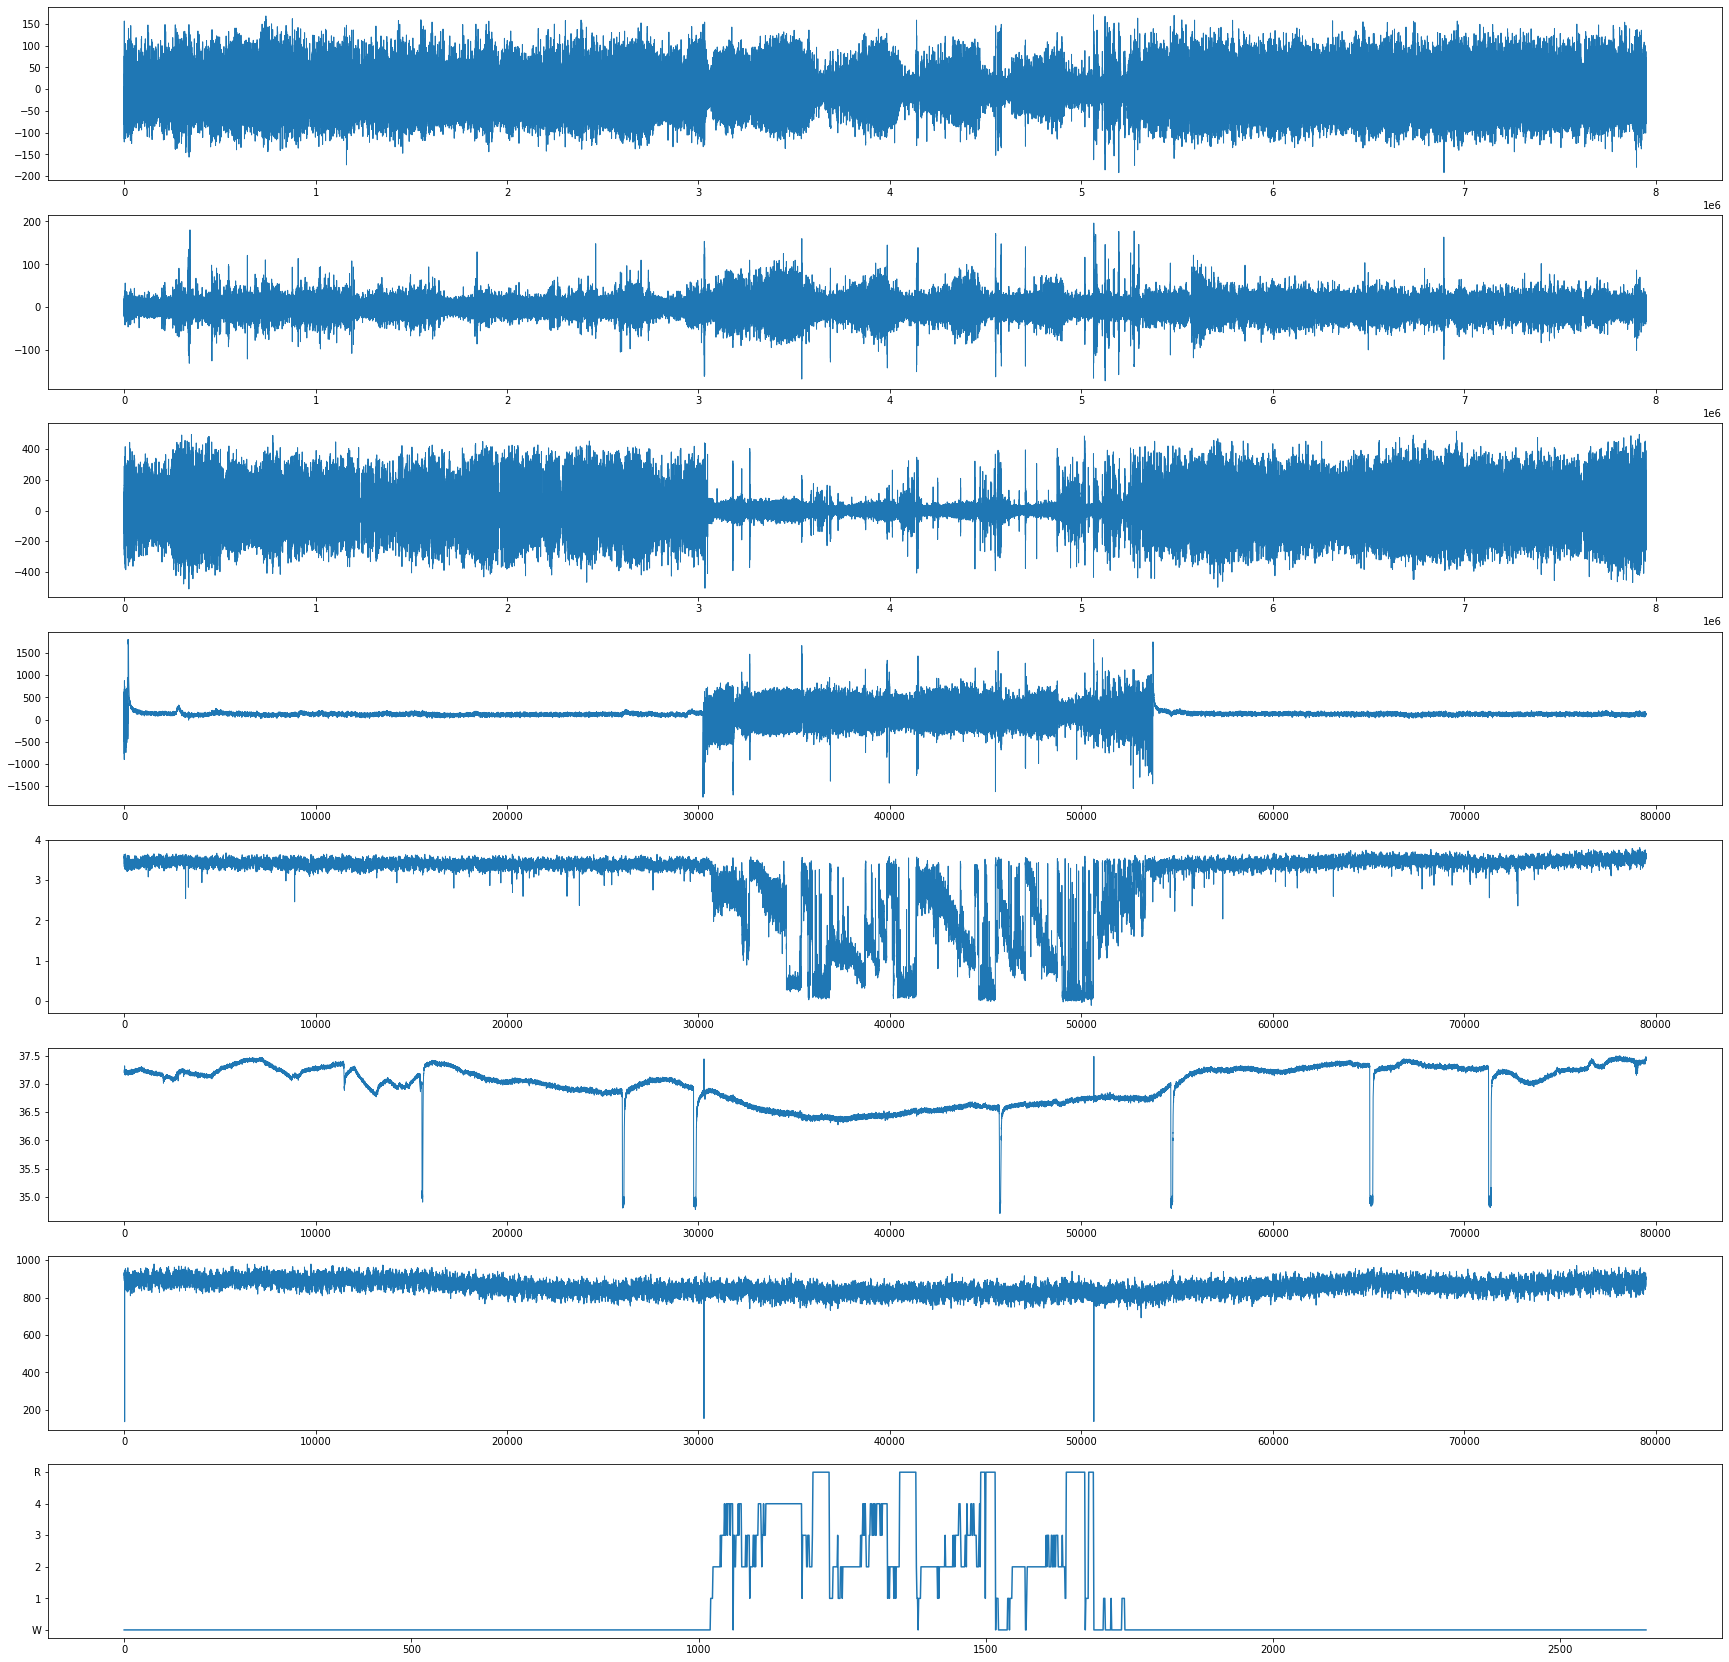

In [322]:
highlevel.read_edf(trains[0])[0]

plt.figure(figsize=(30, 30))
# color = ['blue' , 'orange', 'yellow', 'purple', 'green', 'cyan', 'magenta']
idx = 1
for e in highlevel.read_edf(trains[0])[0]:
    plt.subplot(8,1,idx)
    line = plt.plot(e)
    plt.setp(line, linewidth = 1)
    idx+=1
    
plt.subplot(8,1,8)
plt.plot(sleep_stage)
plt.show()

In [351]:
Fpz_Cz =  highlevel.read_edf(trains[0])[0][0] #PSG EEG Fpz-Cz
Fpz_Cz

array([ 5.01684982, -2.57875458,  1.35970696, ...,  5.2981685 ,
       -4.64175824,  6.61098901])

[array([ 5.01684982, -2.57875458,  1.35970696, ...,  5.2981685 ,
       -4.64175824,  6.61098901]), array([-2.46739927,  1.46739927, -4.0989011 , ..., -3.04322344,
       -3.71501832,  1.75531136]), array([ 16.50866911,  16.01587302,   9.60952381, ...,  69.73064713,
        80.57216117, 102.25518926]), array([-482.,  628.,  -95., ...,  145.,  100.,  125.]), array([3.552, 3.49 , 3.476, ..., 3.546, 3.666, 3.582]), array([37.20645161, 37.22795699, 37.23655914, ..., 37.43978495,
       37.45053763, 37.43225806]), array([920., 899., 919., ..., 884., 898., 898.])]


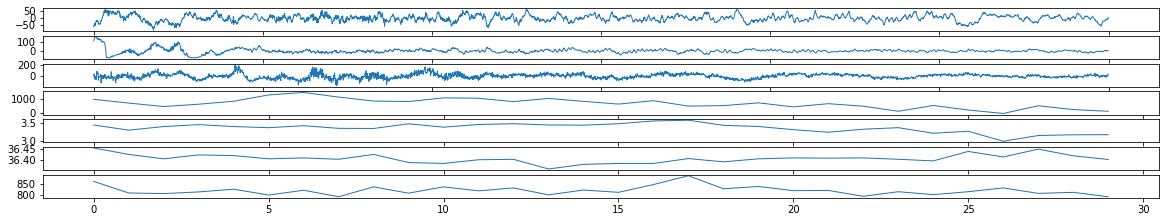

In [378]:
plt.figure(figsize = (20, 4))
idx = 1
print(highlevel.read_edf(trains[0])[0])
for sig in highlevel.read_edf(trains[0])[0]:
    
    plt.subplot(8,1,idx)
    
    if idx <= 3:
        line = plt.plot(sig[35400 * 100 : (35400 +30) * 100])
        plt.setp(line, linewidth = 1)
    else:
        line = plt.plot(sig[35400  : (35400+30)])
        plt.setp(line, linewidth = 1)
        
    idx+=1


# plt.plot(Fpz_Cz[36840 * 100: (36840+180) * 100])
plt.show()

[array([ 5.01684982, -2.57875458,  1.35970696, ...,  5.2981685 ,
       -4.64175824,  6.61098901]), array([-2.46739927,  1.46739927, -4.0989011 , ..., -3.04322344,
       -3.71501832,  1.75531136]), array([ 16.50866911,  16.01587302,   9.60952381, ...,  69.73064713,
        80.57216117, 102.25518926]), array([-482.,  628.,  -95., ...,  145.,  100.,  125.]), array([3.552, 3.49 , 3.476, ..., 3.546, 3.666, 3.582]), array([37.20645161, 37.22795699, 37.23655914, ..., 37.43978495,
       37.45053763, 37.43225806]), array([920., 899., 919., ..., 884., 898., 898.])]


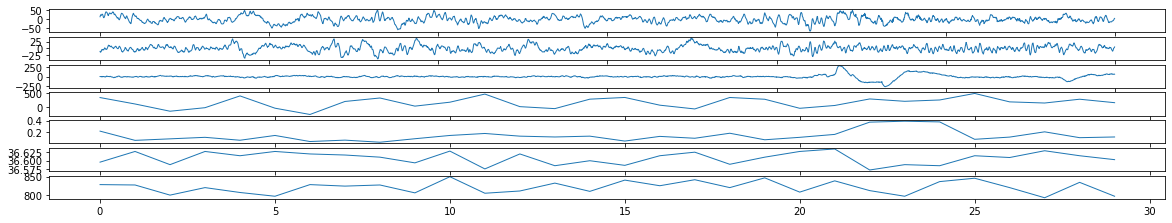

In [377]:
plt.figure(figsize = (20, 4))
idx = 1
print(highlevel.read_edf(trains[0])[0])
for sig in highlevel.read_edf(trains[0])[0]:
    
    plt.subplot(8,1,idx)
    
    if idx <= 3:
        line = plt.plot(sig[44700 * 100 : (44700+30) * 100])
        plt.setp(line, linewidth = 1)
    else:
        line = plt.plot(sig[44700  : (44700+30)])
        plt.setp(line, linewidth = 1)
        
    idx+=1


# plt.plot(Fpz_Cz[36840 * 100: (36840+180) * 100])
plt.show()

[array([ 5.01684982, -2.57875458,  1.35970696, ...,  5.2981685 ,
       -4.64175824,  6.61098901]), array([-2.46739927,  1.46739927, -4.0989011 , ..., -3.04322344,
       -3.71501832,  1.75531136]), array([ 16.50866911,  16.01587302,   9.60952381, ...,  69.73064713,
        80.57216117, 102.25518926]), array([-482.,  628.,  -95., ...,  145.,  100.,  125.]), array([3.552, 3.49 , 3.476, ..., 3.546, 3.666, 3.582]), array([37.20645161, 37.22795699, 37.23655914, ..., 37.43978495,
       37.45053763, 37.43225806]), array([920., 899., 919., ..., 884., 898., 898.])]


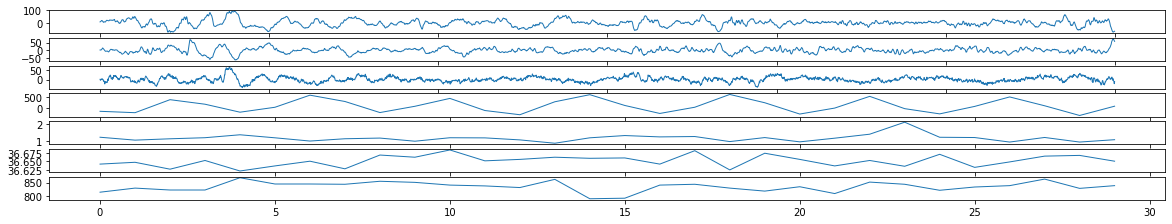

In [379]:
plt.figure(figsize = (20, 4))
idx = 1
print(highlevel.read_edf(trains[0])[0])
for sig in highlevel.read_edf(trains[0])[0]:
    
    plt.subplot(8,1,idx)
    
    if idx <= 3:
        line = plt.plot(sig[48150 * 100 : (48150+30) * 100])
        plt.setp(line, linewidth = 1)
    else:
        line = plt.plot(sig[48150  : (48150+30)])
        plt.setp(line, linewidth = 1)
        
    idx+=1


# plt.plot(Fpz_Cz[36840 * 100: (36840+180) * 100])
plt.show()

[array([ 5.01684982, -2.57875458,  1.35970696, ...,  5.2981685 ,
       -4.64175824,  6.61098901]), array([-2.46739927,  1.46739927, -4.0989011 , ..., -3.04322344,
       -3.71501832,  1.75531136]), array([ 16.50866911,  16.01587302,   9.60952381, ...,  69.73064713,
        80.57216117, 102.25518926]), array([-482.,  628.,  -95., ...,  145.,  100.,  125.]), array([3.552, 3.49 , 3.476, ..., 3.546, 3.666, 3.582]), array([37.20645161, 37.22795699, 37.23655914, ..., 37.43978495,
       37.45053763, 37.43225806]), array([920., 899., 919., ..., 884., 898., 898.])]


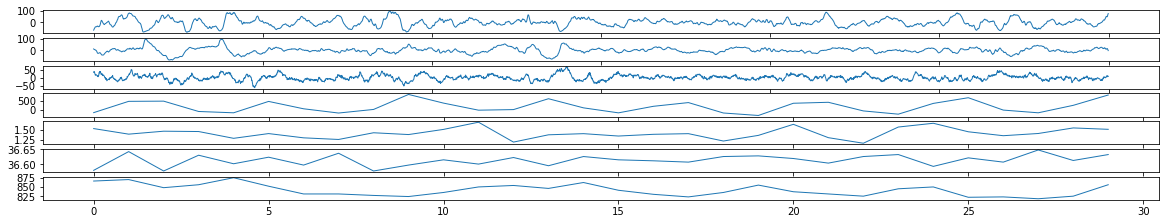

In [380]:
plt.figure(figsize = (20, 4))
idx = 1
print(highlevel.read_edf(trains[0])[0])
for sig in highlevel.read_edf(trains[0])[0]:
    
    plt.subplot(8,1,idx)
    
    if idx <= 3:
        line = plt.plot(sig[44010 * 100 : (44010+30) * 100])
        plt.setp(line, linewidth = 1)
    else:
        line = plt.plot(sig[44010  : (44010+30)])
        plt.setp(line, linewidth = 1)
        
    idx+=1


# plt.plot(Fpz_Cz[36840 * 100: (36840+180) * 100])
plt.show()

[array([ 5.01684982, -2.57875458,  1.35970696, ...,  5.2981685 ,
       -4.64175824,  6.61098901]), array([-2.46739927,  1.46739927, -4.0989011 , ..., -3.04322344,
       -3.71501832,  1.75531136]), array([ 16.50866911,  16.01587302,   9.60952381, ...,  69.73064713,
        80.57216117, 102.25518926]), array([-482.,  628.,  -95., ...,  145.,  100.,  125.]), array([3.552, 3.49 , 3.476, ..., 3.546, 3.666, 3.582]), array([37.20645161, 37.22795699, 37.23655914, ..., 37.43978495,
       37.45053763, 37.43225806]), array([920., 899., 919., ..., 884., 898., 898.])]


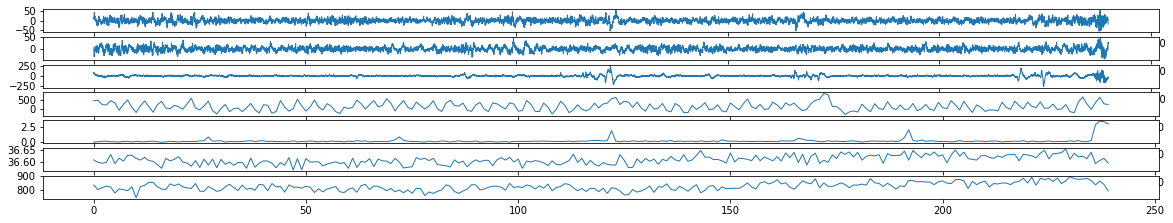

In [382]:
plt.figure(figsize = (20, 4))
idx = 1
print(highlevel.read_edf(trains[0])[0])
for sig in highlevel.read_edf(trains[0])[0]:
    
    plt.subplot(8,1,idx)
    
    if idx <= 3:
        line = plt.plot(sig[44730 * 100 : (44730+240) * 100])
        plt.setp(line, linewidth = 1)
    else:
        line = plt.plot(sig[44730  : (44730+240)])
        plt.setp(line, linewidth = 1)
        
    idx+=1


# plt.plot(Fpz_Cz[36840 * 100: (36840+180) * 100])
plt.show()